**importing required libraries**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler


**reading excel file**

In [62]:
df=pd.read_excel("pca1.xlsx")
df.head()

,X,Y
0,4,11
1,8,4
2,13,5
3,7,14


**defining two features**

In [63]:
X=df['X']
Y=df['Y']

**scatter plot of two features before standardization**

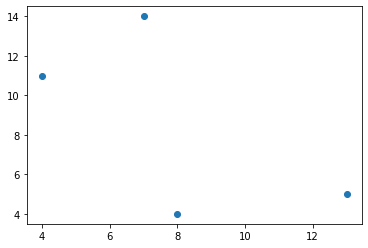

In [64]:
plt.scatter(X,Y)

In [65]:
X=np.array(X)
X=X.reshape(-1,1)
Y=np.array(Y)
Y=Y.reshape(-1,1)

In [66]:
X

array([[ 4],
       [ 8],
       [13],
       [ 7]])

In [67]:
Y

array([[11],
       [ 4],
       [ 5],
       [14]])

**step 1 : standardize the data.In PCA we standardize the data instead of normalization.the reasons for that are stated below:**

1. suppose I have dataset which contains feature like vehicle weight,efficiency,
price.now if I find the how price changes with respect to 100 pound increase in weight,so I get 204 increase in price and 0.6009 reduction in efficiency.
so I can't get the idea about which relationship(weight-price,weight-efficiency) is stronger because unit for weight-price relationship and unit for weight-efficiency is different.

  To get the idea which relationship is stronger we need to standardize the data so that each feature will have same unit and we can get the idea about which relationship is stronger.





2. if we don't standardize then every feature will have different variance.So the feature with the higher variance will affect/dominant the pricipal component more.by stadardizing the features,each feature will have same variance(1) so every feature will have same dominance on pricipal component.


In [68]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
Y=scaler.fit_transform(Y)

In [69]:
X

array([[-1.2344268],
       [ 0.       ],
       [ 1.5430335],
       [-0.3086067]])

In [70]:
Y

array([[ 0.60192927],
       [-1.08347268],
       [-0.84270097],
       [ 1.32424438]])

**scatter plot of two features after standardization**

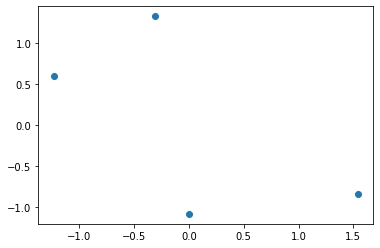

In [71]:
plt.scatter(X,Y)

In [72]:
x_bar=X.mean()
x_bar

-4.163336342344337e-17

In [73]:
y_bar=Y.mean()
y_bar

0.0

**covariance metrics gives the measure of how feature differ with itself or other features**

**defining function for finding covariance between features**

In [74]:
def covariance(first_variable=X,second_variable=Y):
  sum_covariance=0
  for i in range(len(X)):
    sum_covariance=sum_covariance + ((first_variable[i]-x_bar)*(second_variable[i]-y_bar))
    cov=sum_covariance/(len(df['X'])-1)
  return cov

In [75]:
c_xy=c_yx=float(covariance(X,Y))

In [76]:
c_xx=float(covariance(X,X))

In [77]:
c_yy=float(covariance(Y,Y))

In [78]:
c_xx

1.3333333333333333

In [79]:
c_yy

1.3333333333333333

In [80]:
c_xy

-0.8173413784438507

In [81]:
c_yx

-0.8173413784438507

**step 2 : finding covariance metrics**

**In PCA , we calculate the covariance matrix to find the directions of maximum variance in a dataset. The covariance matrix is a square matrix that contains the variances and covariances of all possible pairs of features in a dataset.This information is useful for reducing the dimensionality of the data, by identifying and removing variables that are redundant or not informative,**

In [82]:
c_metrics=np.array([[c_xx,c_xy],[c_yx,c_yy]])
c_metrics

array([[ 1.33333333, -0.81734138],
       [-0.81734138,  1.33333333]])

**step 3 : finding eigen values**

**eigen values give the measure of how much information eigen vector captures.Highest eigen value implies maximum information.because of that, we sort the eigen values in the descending order and find the eigen vector for each eigen values.**

**step 4 : finding eigen vectors**

**eigen vector gives the direction of principal component on which the data points are projected**

In [83]:
eigenvalues,eigenvectors=eig(c_metrics)

In [84]:
eigenvalues

array([2.15067471, 0.51599195])

In [85]:
eigenvectors

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [86]:
e1=eigenvectors[:,0]
e1

array([ 0.70710678, -0.70710678])

In [87]:
e2=eigenvectors[:,1]
e2

array([0.70710678, 0.70710678])

In [88]:
sub_xy=[]
for i in range(len(X)):
  x_comp=(X[i][0]-x_bar)
  y_comp=(Y[i][0]-y_bar)
  sub_xy.append([x_comp,y_comp])

In [89]:
sub_xy

[[-1.2344267996967353, 0.601929265428846],
 [4.163336342344337e-17, -1.0834726777719228],
 [1.543033499620919, -0.8427009716003844],
 [-0.30860669992418377, 1.3242443839434612]]

**step 5 : finding pricipal component.**

**In this step we reduce the dimensionality and find the principal component value for each data point in lower dimension.**

In [90]:
pc1=[]
pc2=[]
for i in range(len(X)):
  t=sub_xy[i]
  t=np.array(t)
  t=t.reshape(2,1)
  e1=e1.reshape(1,2)
  e2=e2.reshape(1,2)
  p1=np.dot(e1,t)
  p2=np.dot(e2,t)
  pc1.append(p1[0][0])
  pc2.append(p2[0][0])


In [91]:
pc1

[-1.2984998263233438,
 0.7661308776828737,
 1.6869690227110858,
 -1.1546000740706157]

In [92]:
pc2

[-0.4472432955645952,
 -0.7661308776828738,
 0.4952098796488378,
 0.7181642935986312]

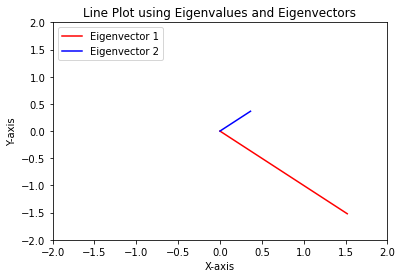

In [93]:
start_point = [x_bar, y_bar]
end_point = [5, 5]
line_points_1 = start_point + eigenvalues[0] * eigenvectors[:, 0]
line_points_2 = start_point + eigenvalues[1] * eigenvectors[:, 1]

plt.plot([start_point[0], line_points_1[0]], [start_point[1], line_points_1[1]], 'r', label='Eigenvector 1')
plt.plot([start_point[0], line_points_2[0]], [start_point[1], line_points_2[1]], 'b', label='Eigenvector 2')

plt.legend(loc='upper left')
plt.title('Line Plot using Eigenvalues and Eigenvectors')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.show()

**checking whether two pc are orthogonal or not using dot product of two variable.if dot product of two principal component is 0 then it is orthogonal**

In [94]:
np.vdot(line_points_1,line_points_2)

-1.1102230246251565e-16

**now using minmaxscaler**

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler=MinMaxScaler()

In [97]:
df=pd.read_excel("pca1.xlsx")
df.head()

,X,Y
0,4,11
1,8,4
2,13,5
3,7,14


In [98]:
X=df['X']
Y=df['Y']

In [99]:
X=np.array(X)
X=X.reshape(-1,1)
Y=np.array(Y)
Y=Y.reshape(-1,1)

In [100]:
X=scaler.fit_transform(X)
Y=scaler.fit_transform(Y)

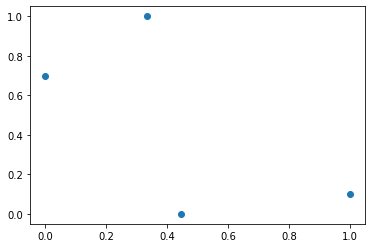

In [101]:
plt.scatter(X,Y)

In [102]:
x_bar=X.mean()
x_bar

0.4444444444444444

In [103]:
y_bar=Y.mean()
y_bar

0.45

In [104]:
def covariance(first_variable=X,second_variable=Y):
  sum_covariance=0
  for i in range(len(X)):
    sum_covariance=sum_covariance + ((first_variable[i]-x_bar)*(second_variable[i]-y_bar))
    cov=sum_covariance/(len(df['X'])-1)
  return cov

In [105]:
c_xy=c_yx=float(covariance(X,Y))

In [106]:
c_xx=float(covariance(X,X))

In [107]:
c_yy=float(covariance(Y,Y))

In [108]:
c_metrics=np.array([[c_xx,c_xy],[c_yx,c_yy]])
c_metrics

array([[ 0.17283951, -0.12222222],
       [-0.12222222,  0.23      ]])

In [109]:
eigenvalues,eigenvectors=eig(c_metrics)

In [110]:
eigenvalues

array([0.07590042, 0.32693908])

In [111]:
eigenvectors

array([[-0.78348452,  0.6214113 ],
       [-0.6214113 , -0.78348452]])

In [112]:
e1=eigenvectors[:,0]
e1

array([-0.78348452, -0.6214113 ])

In [113]:
e2=eigenvectors[:,1]
e2

array([ 0.6214113 , -0.78348452])

In [114]:
sub_xy=[]
for i in range(len(X)):
  x_comp=(X[i][0]-x_bar)
  y_comp=(Y[i][0]-y_bar)
  sub_xy.append([x_comp,y_comp])

In [115]:
sub_xy

[[-0.4444444444444444, 0.25000000000000006],
 [0.0, -0.45],
 [0.5555555555555556, -0.35000000000000003],
 [-0.11111111111111116, 0.55]]

In [116]:
pc1=[]
pc2=[]
for i in range(len(X)):
  t=sub_xy[i]
  t=np.array(t)
  t=t.reshape(2,1)
  e1=e1.reshape(1,2)
  e2=e2.reshape(1,2)
  p1=np.dot(e1,t)
  p2=np.dot(e2,t)
  pc1.append(p1[0][0])
  pc2.append(p2[0][0])


In [117]:
pc1

[0.1928625153605027,
 0.2796350870583469,
 -0.21777522027909949,
 -0.25472238213975007]

In [118]:
pc2

[-0.4720539316289515,
 0.35256803327282915,
 0.6194480839755917,
 -0.4999621856194695]

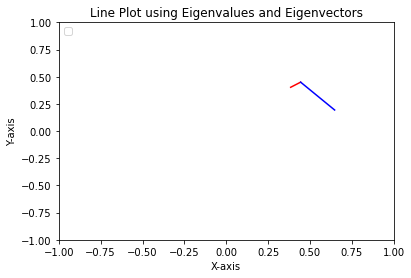

In [119]:
start_point = [x_bar, y_bar]
end_point = [5, 5]
line_points_1 = start_point + eigenvalues[0] * eigenvectors[:, 0]
line_points_2 = start_point + eigenvalues[1] * eigenvectors[:, 1]

plt.plot([start_point[0], line_points_1[0]], [start_point[1], line_points_1[1]], 'r')
plt.plot([start_point[0], line_points_2[0]], [start_point[1], line_points_2[1]], 'b')

plt.legend(loc='upper left')
plt.title('Line Plot using Eigenvalues and Eigenvectors')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()

In [120]:
np.vdot(line_points_1,line_points_2)

0.32740343338486666